In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('scores.csv').drop_duplicates()
df_plot = df[df["Parser"] == 'TB']
df_plot = df_plot.groupby(["Parser", "Tags", "Perturbation", "Perturbed tagging"]).mean().reset_index()

df_plot = df_plot[(df_plot['Perturbed tagging'].isin(['perturbed', 'none']))]

# multiply + 1.1 LAS for df_plot['Tags'] != 'none'

# order by tags none, upos, xpos, feats
df_plot['Tags'] = pd.Categorical(df_plot['Tags'], ['none', 'upos', 'xpos', 'feats'])
round(df_plot.pivot_table(index=['Perturbation'], columns=['Tags', 'Perturbed tagging'], values='LAS'), 2)

df

,Treebank,Parser,Tags,Perturbed tagging,Perturbation,UAS,UAS std,LAS,LAS std,Tagger acc,Tagger acc std,Epochs
0,UD_Afrikaans-AfriBooms,SL,none,none,0.0,79.870,0.000000,74.340,0.000000,NaN,0.0,1
1,UD_Basque-BDT,SL,none,none,0.0,75.220,0.000000,68.820,0.000000,NaN,0.0,1
2,UD_English-EWT,SL,none,none,0.0,84.640,0.000000,80.900,0.000000,NaN,0.0,1
3,UD_Finnish-TDT,SL,none,none,0.0,70.240,0.000000,59.350,0.000000,NaN,0.0,1
4,UD_German-GSD,SL,none,none,0.0,81.620,0.000000,75.590,0.000000,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,UD_Finnish-TDT,GB,none,none,7.5,88.599,0.141736,84.987,0.159063,NaN,0.0,10
3344,UD_Finnish-TDT,GB,none,none,12.5,88.064,0.233675,84.230,0.260308,NaN,0.0,10
3345,UD_Finnish-TDT,GB,none,none,17.5,87.556,0.198252,83.452,0.173309,NaN,0.0,10
3346,UD_German-GSD,GB,none,none,2.5,87.196,0.070880,82.159,0.073953,NaN,0.0,10


In [74]:

df = pd.read_csv('scores.csv').drop_duplicates()
df_plot = df[df["Parser"] == 'SL']
df_plot = df_plot[(df['Perturbed tagging'].isin(['unperturbed', 'none']))]
df_plot = df_plot[(df['Perturbation'].isin([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))]

df_plot = df_plot.groupby(["Tags", "Perturbation"]).mean().reset_index()
df_plot = df_plot[(df_plot['Tags'].isin(['none', 'upos', 'xpos', 'feats']))]

# order by tags none, upos, xpos, feats
df_plot['Tags'] = pd.Categorical(df_plot['Tags'], ['none', 'upos', 'xpos', 'feats'])
round(df_plot.pivot_table(index=['Perturbation'], columns=['Tags'], values='LAS'), 2)


/tmp/ipykernel_23902/1982006142.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_plot[(df['Perturbed tagging'].isin(['unperturbed', 'none']))]
/tmp/ipykernel_23902/1982006142.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_plot[(df['Perturbation'].isin([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))]


Tags,none,upos,xpos,feats
Perturbation,,,,
0.0,68.29,68.98,70.96,66.79
10.0,66.71,68.60,70.53,66.19
20.0,65.18,68.19,70.08,65.62
30.0,63.62,67.76,69.62,64.99
40.0,62.09,67.34,69.13,64.46
50.0,60.52,66.88,68.66,63.79
60.0,58.94,66.40,68.19,63.18
70.0,57.44,65.95,67.72,62.56
80.0,55.90,65.45,67.23,61.92


In [25]:
df = pd.read_csv('scores.csv').drop_duplicates()
df_plot = df[df["Parser"] == 'TB']
df_plot = df_plot[(df['Perturbed tagging'].isin(['perturbed', 'none']))]
df_plot = df_plot.groupby(["Parser", "Tags", "Tagger acc"]).mean().reset_index()

df_plot['Tags'] = pd.Categorical(df_plot['Tags'], ['none', 'upos', 'xpos', 'feats'])
round(df_plot.pivot_table(index=['Perturbation'], columns=['Tags'], values='Tagger acc'), 2)

/tmp/ipykernel_23902/267485379.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_plot[(df['Perturbed tagging'].isin(['perturbed', 'none']))]


Tags,upos,xpos,feats
Perturbation,,,
0.0,89.76,87.80,83.38
10.0,88.56,86.17,81.68
20.0,87.38,84.59,79.94
30.0,86.17,82.91,78.22
40.0,84.93,81.30,76.50
50.0,83.71,79.61,74.68
60.0,82.48,77.90,72.92
70.0,81.19,76.13,71.13
80.0,79.93,74.42,69.37


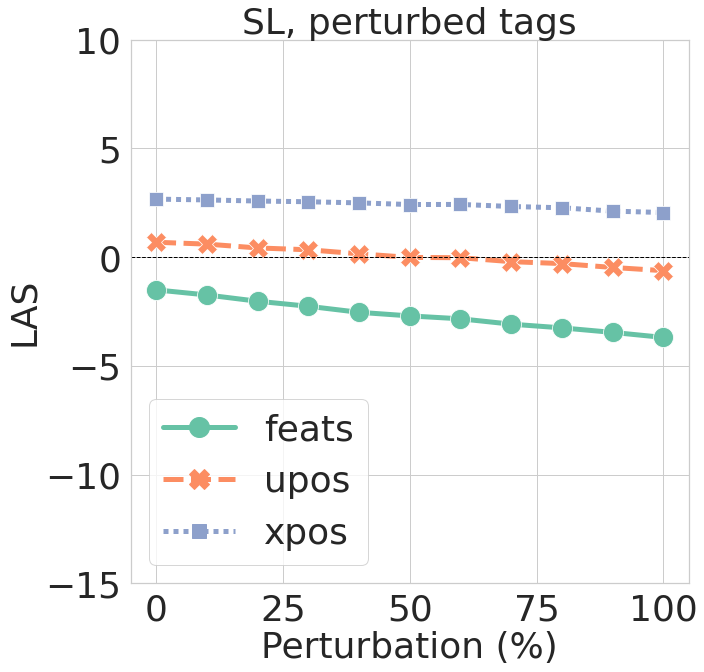

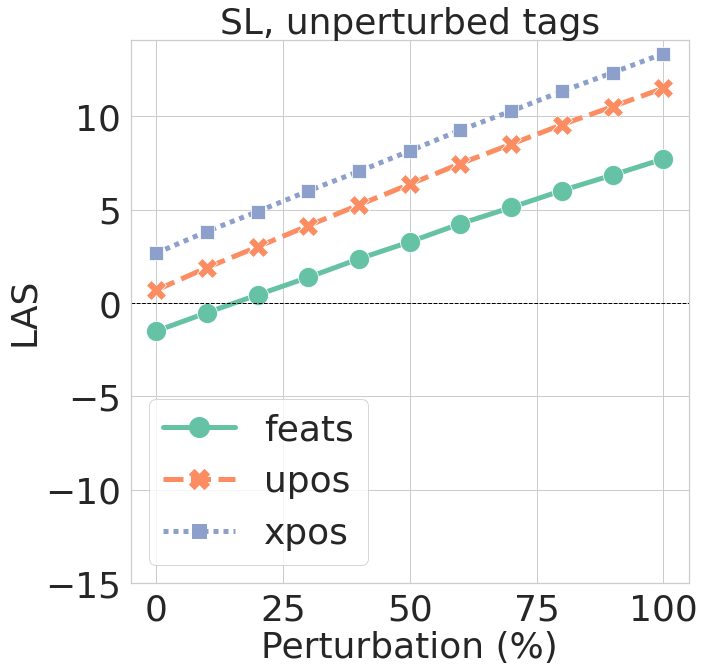

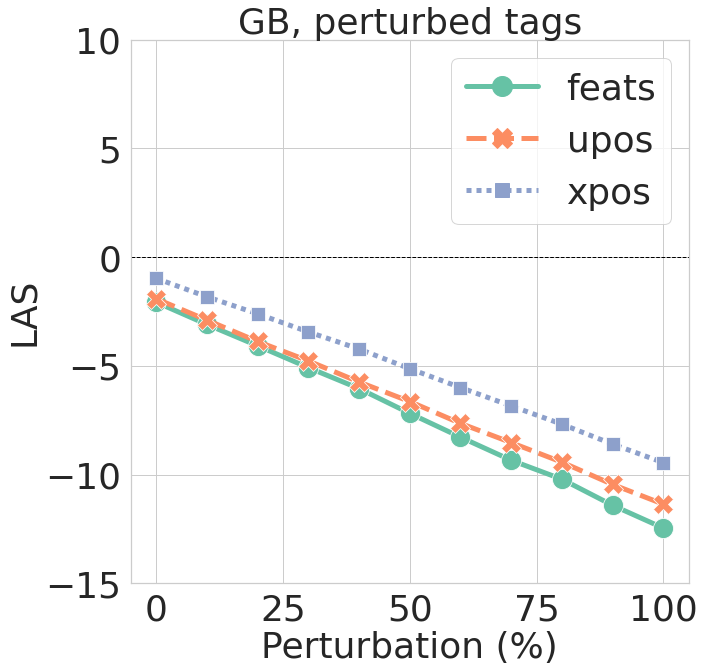

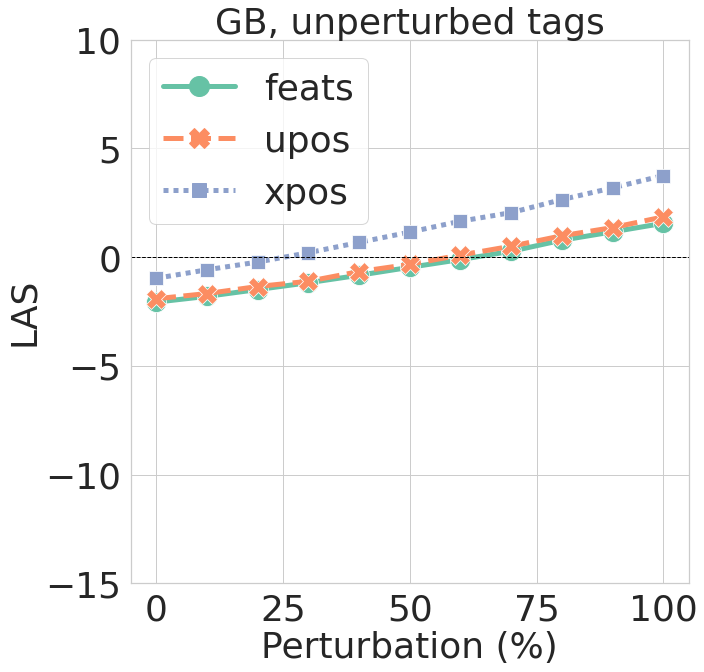

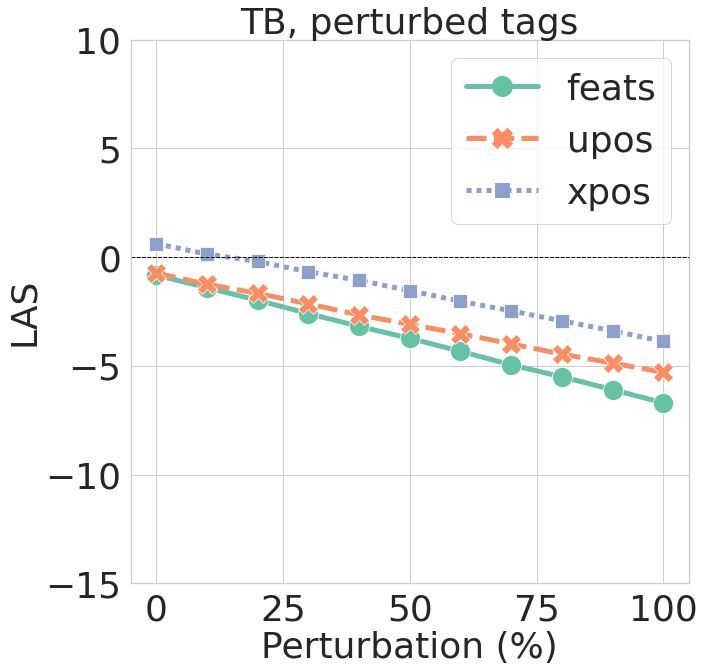

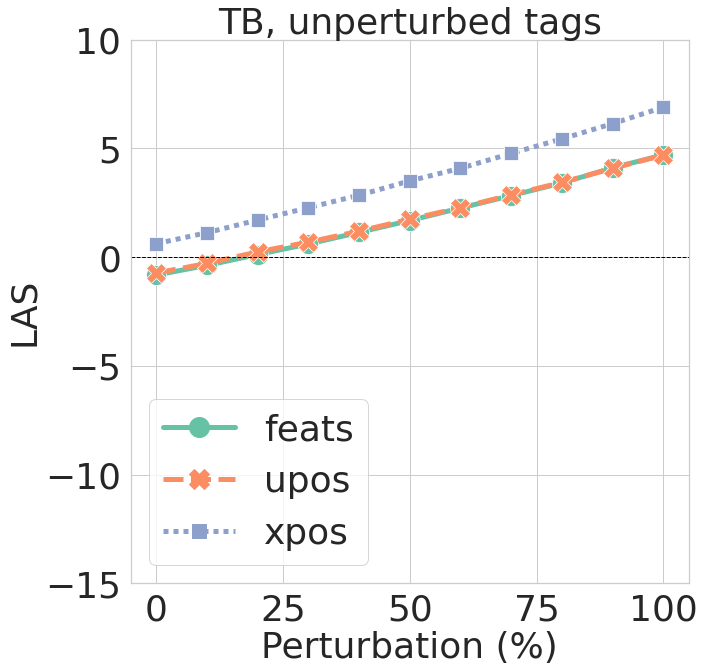

In [ ]:
plots = []
for parser in ['SL', 'GB', 'TB']:
    for perturbed_tagging in ['perturbed', 'unperturbed']:
     #, 'TB', 'GB']:#, 'SL']:
        df = pd.read_csv('scores.csv').drop_duplicates()
        pertured_tagging = [perturbed_tagging, 'none']
        df_plot = df[df["Parser"] == parser]
        df_plot = df_plot.groupby(["Parser", "Tags", "Perturbation", "Perturbed tagging"]).mean().reset_index()

        df_plot = df_plot[(df_plot["Perturbed tagging"].isin(pertured_tagging))]
        df_plot = df_plot.pivot(index='Perturbation', columns='Tags', values='LAS')
        df_plot['upos'] = df_plot['upos'] - df_plot['none']
        df_plot['xpos'] = df_plot['xpos'] - df_plot['none']
        df_plot['feats'] = df_plot['feats'] - df_plot['none']
        df_plot = df_plot.drop(columns=['none'])
        df_plot = df_plot.reset_index()
        df_plot = df_plot.melt('Perturbation', var_name='Tags', value_name='LAS')

        # square figure
        fig = plt.figure(figsize=(10, 10))
        # fontsize bigger
        sns.set_theme(style="whitegrid")
        plot = sns.lineplot(x="Perturbation", y="LAS", hue="Tags", data=df_plot, palette="Set2", style="Tags", linewidth=5, markers=True, markersize=20)
        plot.set(xlabel='Perturbation (%)', ylabel='LAS')
        plot.set_title(f'{parser}, {perturbed_tagging} tags')
        # increase fontsize in labels, title and legend
        fontsize = 36
        # increase markersize
        plot.legend(fontsize=fontsize, markerscale=20)
        plot.tick_params(labelsize=fontsize)
        plot.set_xlabel(plot.get_xlabel(), fontsize=fontsize)
        plot.set_ylabel(plot.get_ylabel(), fontsize=fontsize)
        plot.set_title(plot.get_title(), fontsize=fontsize)

        # thicker objects in legend
        plot.legend(fontsize=fontsize)
        for legobj in plot.legend_.legendHandles:
            legobj.set_linewidth(5.0)
            # bigger markers
            legobj.set_markersize(20.0)
        

        plot.axhline(y=0, color='black', linestyle='--', linewidth=1)
        # set ylimit to (-12, 3)
        plot.set_yticks(np.arange(-15, 15, 5))

        savefig = plot.get_figure()
        plots.append(savefig)
        savefig.savefig(f'plots/new_{parser}_{perturbed_tagging}.png')


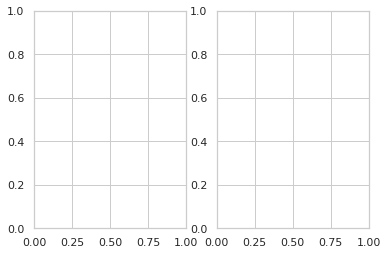

In [ ]:
sl_perturbed = plots[0]
sl_unperturbed = plots[1]

fig, axs = plt.subplots(1, 2)

In [ ]:
df = pd.read_csv('scores.csv').drop_duplicates()

df_plot = df[df["Parser"] == "SL"]
df_plot = df_plot.groupby(["Parser", "Tags", "Perturbation", "Perturbed tagging"]).mean().reset_index()

df_plot = df_plot[(df_plot["Perturbed tagging"].isin(["perturbed", "none"]))]
df_plot = df_plot.pivot(index='Perturbation', columns='Tags', values='LAS')
# order columns: none, upos, xpos, feats
df_plot = df_plot[['none', 'upos', 'xpos', 'feats']]
round(df_plot, 2)

Tags,none,upos,xpos,feats
Perturbation,,,,
0,68.29,68.98,70.96,66.79
10,66.71,67.31,69.34,64.97
20,65.18,65.61,67.76,63.16
30,63.62,63.96,66.17,61.36
40,62.09,62.24,64.59,59.55
50,60.52,60.50,62.94,57.81
60,58.94,58.91,61.36,56.10
70,57.44,57.24,59.77,54.36
80,55.90,55.61,58.17,52.65
